In [740]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [741]:
import re
import matplotlib.pyplot as plt
import seaborn as sb
import scikitplot as skplt

In [742]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [743]:
train.shape, test.shape

((891, 12), (418, 11))

In [744]:
train.head() # Pclass - Ticket class, 
             # SibSp - # of siblings / spouses aboard the Titanic, 
             # Parch - # of parents / children aboard the Titanic,
             # Embarked - Port of Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [745]:
np.unique(train["Pclass"]), np.unique(train["SibSp"]), np.unique(train["Parch"]), train["Embarked"].unique()

(array([1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 8]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array(['S', 'C', 'Q', nan], dtype=object))

In [746]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [747]:
# null values in the dataframe :
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [748]:
# removing null value of embarked by droppping it 
train = train.dropna(axis=0, subset=["Embarked"])
train.shape

(889, 12)

In [749]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Age base survival analysis

In [750]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([36., 19., 63., 65., 51., 24., 21.,  8.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

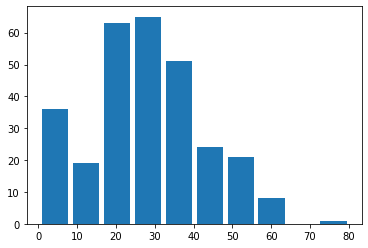

In [751]:
age = train[train["Survived"]==1]["Age"]
plt.hist(age,rwidth=0.85)

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <a list of 10 Patch objects>)

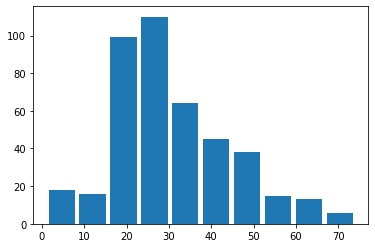

In [752]:
age = train[train["Survived"]==0]["Age"]
plt.hist(age,rwidth=0.85)

Those who lost their live are commonly young generation of that time(20-40 year old).

# Gender Base analysis

In [753]:
train["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [754]:
male_survived = train[train["Sex"]=='male']["Survived"]
female_survived = train[train["Sex"]=='female']["Survived"]

In [755]:
# survival rate : 
print("Survival rate for Men : {}\nSurvival rate for Women : {}".format(sum(male_survived)/len(male_survived) *100, sum(female_survived)/len(female_survived)*100))

Survival rate for Men : 18.890814558058924
Survival rate for Women : 74.03846153846155


In [756]:
# Let's check for the kids having age(<18)

kids = train[train["Age"]<=18]["Survived"]
print("Survival rate for kids : {}".format(sum(kids)/len(kids)*100))

Survival rate for kids : 50.35971223021583


# So it is True Survival rate for womens and kids are higher than man's.
# Well done gentleman

In [757]:
# Compairing the price of the passengers who has cabin and who doesn't have a cabin(their cabin are not known)
ticket_price_with_cabin = np.array(train[train['Cabin'].notnull()]["Fare"])
ticket_price_without_cabin = np.array(train[train['Cabin'].isnull()]["Fare"])

# Hypothesis testing

In [758]:
# Peoples without cabins: Lower class or Middle Class (Financial status)
# People with cabin : Upper class (Financial status)

print("************ People without cabin **********************")
print("Mean : {}\tSD : {}".format(ticket_price_without_cabin.mean(), ticket_price_without_cabin.std()))
print("Min : {}\tMax : {}".format(min(ticket_price_without_cabin), max(ticket_price_without_cabin)))

print("************ People with cabin ************************")
print("Mean : {}\tSD : {}".format(ticket_price_with_cabin.mean(), ticket_price_with_cabin.std()))
print("Min : {}\tMax : {}".format(min(ticket_price_with_cabin), max(ticket_price_with_cabin)))

************ People without cabin **********************
Mean : 19.157325327510915	SD : 28.64247465459668
Min : 0.0	Max : 512.3292
************ People with cabin ************************
Mean : 76.10330099009902	SD : 74.57466172762304
Min : 0.0	Max : 512.3292


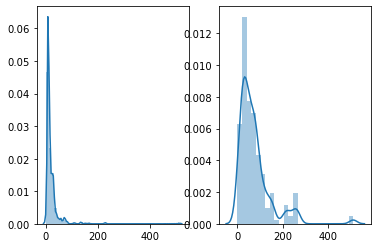

In [759]:
plt.subplot(1, 2, 1)
sb.distplot(ticket_price_without_cabin, kde=True)

plt.subplot(1, 2, 2)
sb.distplot(ticket_price_with_cabin, kde=True)
plt.show()

In [760]:
train["Pclass"].value_counts() 

3    491
1    214
2    184
Name: Pclass, dtype: int64

### Class Category :
1. 1st = Upper
2. 2nd = Middle
3. 3rd = Lower

In [761]:
without_cabin  = dict(train[train['Cabin'].isnull()]["Pclass"].value_counts())
with_cabin = dict(train[train['Cabin'].notnull()]["Pclass"].value_counts())
without_cabin = [without_cabin[1], without_cabin[2], without_cabin[3]]
with_cabin = [with_cabin[1], with_cabin[2], with_cabin[3]]

data = pd.DataFrame({"With cabin": with_cabin, "Without cabin": without_cabin}, index=[1,2,3])

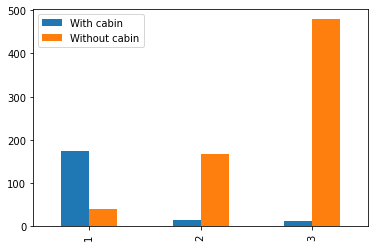

In [762]:
data.plot.bar()

# This is the clear indication that people who buy ticket in cruise with the cabin are financially strong.

In [763]:
# Are the cabin crew preferenced upper class people while saving them over middle and lower class people.

upper_class = train[train["Pclass"]==3]["Survived"]
middle_class = train[train["Pclass"]==2]["Survived"]
lower_class = train[train["Pclass"]==1]["Survived"]

In [764]:
upper = [upper_class.sum(), len(upper_class)-upper_class.sum()]
middle = [middle_class.sum(), len(middle_class)-middle_class.sum()] 
lower = [lower_class.sum() , len(lower_class)-lower_class.sum()]

data = pd.DataFrame({"upper":upper,"middle":middle, "lower":lower})


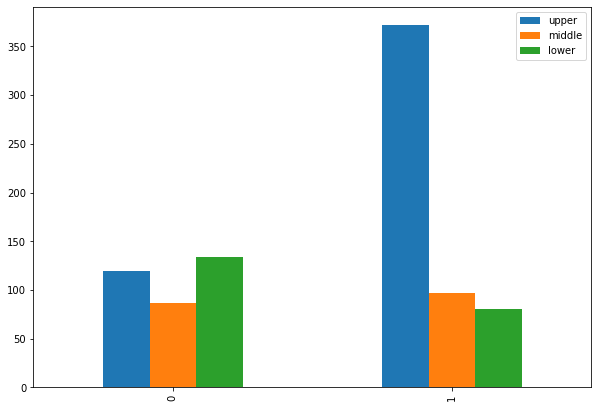

In [765]:
data. plot.bar(figsize=(10,7))   # 0 - Not survived 
                                 # 1 - Survived

# People from the upper class are survied more than middle and lower class

# Feature engineering

In [766]:
# Age binning
# 1 : 1-10
# 2 : 10-20 ......
def age(data):
    arr = []
    for i in data:
        try:
            arr.append(int(i / 10))
        except:
            arr.append(0)
    return arr
train["Age"] = age(train["Age"])
test["Age"] = age(test["Age"])

In [767]:
def fare(data):
    fare = []
    for i in data:
        if 0<i<10: fare.append(1)
        elif 10<i<30: fare.append(2)
        elif 30<i<50: fare.append(3)
        elif 50<i<100: fare.append(4)
        else: fare.append(5)
    return fare
train["Fare"] = fare(train["Fare"])
test["Fare"] = fare(test["Fare"])

In [768]:
gender = {"male":1, "female":0}
embarked = {'S':1, 'C':0, 'Q':2}

train["Sex"] = train["Sex"].map(gender)
test["Sex"] = test["Sex"].map(gender)

train["Embarked"] = train["Embarked"].map(embarked)
test["Embarked"] = test["Embarked"].map(embarked)

In [769]:
train["Cabin"] = train["Cabin"].fillna(0)
test["Cabin"] = test["Cabin"].fillna(0)

In [770]:
def cabin_f(data):
    cabin = []
    cabinet_no= []
    cabinet = {'A':1,'B':2,'C':3,'D':4,'E':5,
              'F':6,'G':7,'T':8}
    for i in data:
        if i!=0:
            cabin.append(cabinet["".join(re.split("[^a-zA-Z]*", i))[0]])
            temp = re.split("[^0-9]",i)[1]
            if temp:
                cabinet_no.append(int(temp))
            else: cabinet_no.append(0)
        else:
            cabin.append(0)
            cabinet_no.append(0)
    return cabin, cabinet_no

cabin, cabinet_no = cabin_f(train["Cabin"])
train["Cabin_type"] = cabin
train["Cabin_no"] = cabinet_no

cabin, cabinet_no = cabin_f(test["Cabin"])
test["Cabin_type"] = cabin
test["Cabinet_no"] = cabinet_no

train = train.drop("Cabin", axis=1)
test = test.drop("Cabin", axis=1)

In [771]:
train["Title"] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train["Title"] = train["Title"].replace(['Lady', 'Capt', 'Don', 'Col', 'Countess', 'Dona', 'Jonkheer', 'Dr', 'Major', 'Rev', 'Sir'], 'rare')

test["Title"] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test["Title"] = test["Title"].replace(['Lady', 'Capt', 'Don', 'Col', 'Countess', 'Dona', 'Jonkheer', 'Dr', 'Major', 'Rev', 'Sir'], 'rare')

mapper = {'rare':1, 'Mr':2, 'Mrs':3, 'Miss':4,'Master':5 }

train['Title'] = train['Title'].map(mapper)
test['Title'] = test['Title'].map(mapper)
train['Title'] = train['Title'].fillna(0)
test['Title'] = test['Title'].fillna(0)

In [772]:
train["Family_member"] = train["SibSp"] + train["Parch"] + 1
test["Family_member"] = test["SibSp"] + test["Parch"] +1

In [773]:
train["Alone"] = [1 if i==1 else 0 for i in train["Family_member"]]
test["Alone"] = [1 if i==1 else 0 for i in test["Family_member"]]

In [774]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_type,Cabin_no,Title,Family_member,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,1,1,0,0,2.0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,4,0,3,85,3.0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,1,1,0,0,4.0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,4,1,3,123,3.0,2,0
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,1,1,0,0,2.0,1,1


# Correlation plot

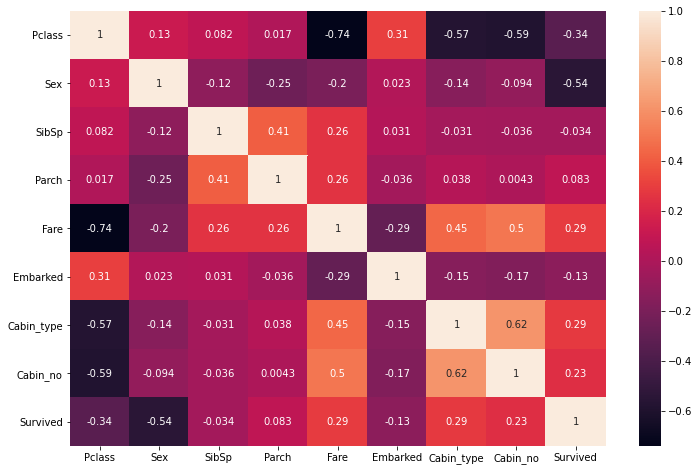

In [775]:
data = train[["Pclass", "Sex", "SibSp", "Parch", "Ticket", "Fare", "Embarked", "Cabin_type", "Cabin_no", "Survived"]]

fig, ax = plt.subplots(figsize=(12, 8)) 
sb.heatmap(data.corr(),  ax= ax, annot= True)

# Conclusion:
1. Ticket Fare is highly correlated with ticket class (it is negative becasue ticket class is reverse in order).
2. Cabin type is also depend upon ticket type.
3. Survival depend upon sex.



In [776]:
train["Survived"].value_counts()    # Not imbalanced looks fine

0    549
1    340
Name: Survived, dtype: int64

In [777]:
y = train["Survived"]

test_id = test["PassengerId"]
test = test.drop(["PassengerId", "Name", "Ticket"], axis=1)
train = train.drop(["PassengerId", "Name", "Ticket", "Survived"], axis=1)

In [778]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, f1_score

In [779]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
train = scaler.fit_transform(train)
scaler = StandardScaler()
test = scaler.fit_transform(test)

In [780]:
xtrain, xtest, ytrain, ytest = train_test_split(train, y, train_size=0.80)
xtrain.shape, xtest.shape

((711, 12), (178, 12))

# Logistic Regression

In [781]:
grid={"C":np.logspace(-3,3,7), 
      "penalty":['l1','l2'], 
      "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

model = LogisticRegression()
model = GridSearchCV(model,grid,cv=10)
model.fit(xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",model.best_params_)
print("accuracy :",model.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.8016823161189359


In [782]:
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Test accuracy : ",model.score(xtest, ytest))
lr_acc = model.score(xtest, ytest)
print("F1 score : ", f1_score(prediction, ytest))
print("Confusion metrics : \n", confusion_matrix(ytest, prediction))


Training accuracy :  0.7834036568213784
Test accuracy :  0.797752808988764
F1 score :  0.7142857142857143
Confusion metrics : 
 [[97 17]
 [19 45]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


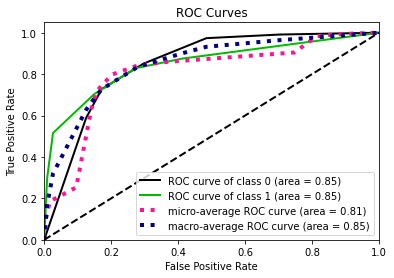

In [783]:
prob = model.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, prob)
plt.show()

# Decision tree

In [784]:
grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 25)}

model = DecisionTreeClassifier()
model = GridSearchCV(model,grid,cv=10)
model.fit(xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",model.best_params_)
print("accuracy :",model.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6}
accuracy : 0.8199921752738654


In [785]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=8)
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Test accuracy : ",model.score(xtest, ytest))
dt_acc = model.score(xtest, ytest)
print("F1 score : ", f1_score(prediction, ytest))
print("Confusion metrics : \n", confusion_matrix(ytest, prediction))

Training accuracy :  0.8748241912798875
Test accuracy :  0.8089887640449438
F1 score :  0.7301587301587302
Confusion metrics : 
 [[98 16]
 [18 46]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


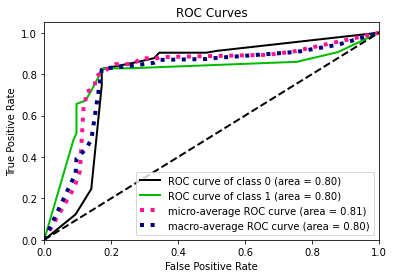

In [786]:
prob = model.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, prob)
plt.show()

# Random Forest

In [787]:
"""grid={ 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

model = RandomForestClassifier()
model = GridSearchCV(model,grid,cv=10)
model.fit(xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",model.best_params_)
print("accuracy :",model.best_score_)"""

'grid={ \n    \'n_estimators\': [200, 500],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n    \'max_depth\' : [4,5,6,7,8],\n    \'criterion\' :[\'gini\', \'entropy\']\n}\n\nmodel = RandomForestClassifier()\nmodel = GridSearchCV(model,grid,cv=10)\nmodel.fit(xtrain,ytrain)\n\nprint("tuned hpyerparameters :(best parameters) ",model.best_params_)\nprint("accuracy :",model.best_score_)'

In [788]:
model = RandomForestClassifier(criterion= 'gini', max_depth=3, max_features='auto', n_estimators= 200)
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Test accuracy : ",model.score(xtest, ytest))
rf_acc = model.score(xtest, ytest)
print("F1 score : ", f1_score(prediction, ytest))
print("Confusion metrics : \n", confusion_matrix(ytest, prediction))

Training accuracy :  0.8185654008438819
Test accuracy :  0.848314606741573
F1 score :  0.7874015748031497
Confusion metrics : 
 [[101  13]
 [ 14  50]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


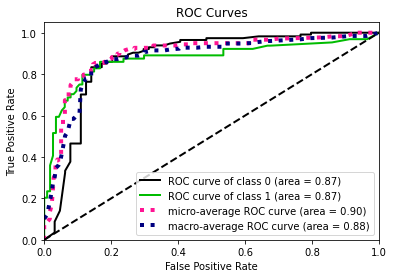

In [789]:
prob = model.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, prob)
plt.show()

# SVC

In [790]:
"""grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

model = SVC()
model = GridSearchCV(model,grid,cv=10)
model.fit(xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",model.best_params_)
print("accuracy :",model.best_score_)"""

'grid = {\'C\':[1,10,100,1000],\'gamma\':[1,0.1,0.001,0.0001], \'kernel\':[\'linear\',\'rbf\']}\n\nmodel = SVC()\nmodel = GridSearchCV(model,grid,cv=10)\nmodel.fit(xtrain,ytrain)\n\nprint("tuned hpyerparameters :(best parameters) ",model.best_params_)\nprint("accuracy :",model.best_score_)'

In [791]:
model = SVC(C= 10, gamma=0.1, kernel='rbf')
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Test accuracy : ",model.score(xtest, ytest))
svc_acc = model.score(xtest, ytest)
print("F1 score : ", f1_score(prediction, ytest))
print("Confusion metrics : \n", confusion_matrix(ytest, prediction))

Training accuracy :  0.8931082981715893
Test accuracy :  0.8202247191011236
F1 score :  0.7419354838709677
Confusion metrics : 
 [[100  14]
 [ 18  46]]


# Knn

In [792]:
grid = {'n_neighbors':[3,5,11,19],'weights':['uniform', 'distance'], 'metric':['euclidean','manhattan']}

model = KNeighborsClassifier()
model = GridSearchCV(model,grid,cv=10)
model.fit(xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",model.best_params_)
print("accuracy :",model.best_score_)

tuned hpyerparameters :(best parameters)  {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
accuracy : 0.8214006259780907


In [793]:
model = KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Test accuracy : ",model.score(xtest, ytest))
knn_acc = model.score(xtest, ytest)
print("F1 score : ", f1_score(prediction, ytest))
print("Confusion metrics : \n", confusion_matrix(ytest, prediction))

Training accuracy :  0.9324894514767933
Test accuracy :  0.8258426966292135
F1 score :  0.7737226277372263
Confusion metrics : 
 [[94 20]
 [11 53]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


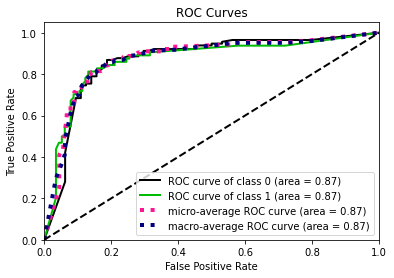

In [794]:
prob = model.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, prob)
plt.show()

# Ada Boosting

In [795]:
"""grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }
tree = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

model = AdaBoostClassifier(base_estimator = tree)
model = GridSearchCV(model, grid, scoring = 'roc_auc')
model.fit(xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",model.best_params_)
print("accuracy :",model.best_score_)"""

'grid = {"base_estimator__criterion" : ["gini", "entropy"],\n              "base_estimator__splitter" :   ["best", "random"],\n              "n_estimators": [1, 2]\n             }\ntree = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)\n\nmodel = AdaBoostClassifier(base_estimator = tree)\nmodel = GridSearchCV(model, grid, scoring = \'roc_auc\')\nmodel.fit(xtrain,ytrain)\n\nprint("tuned hpyerparameters :(best parameters) ",model.best_params_)\nprint("accuracy :",model.best_score_)'

In [796]:
tree = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

model = AdaBoostClassifier(base_estimator=tree)
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Test accuracy : ",model.score(xtest, ytest))
ada_acc = model.score(xtest, ytest)
print("F1 score : ", f1_score(prediction, ytest))
print("Confusion metrics : \n", confusion_matrix(ytest, prediction))

Training accuracy :  0.9324894514767933
Test accuracy :  0.8033707865168539
F1 score :  0.7445255474452555
Confusion metrics : 
 [[92 22]
 [13 51]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


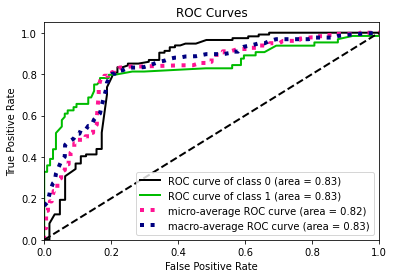

In [797]:
prob = model.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, prob)
plt.show()

 # Gradient Boosting

In [798]:
"""grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.075, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 8),
    "min_samples_leaf": np.linspace(0.1, 0.5, 8),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.8, 0.9,  1.0],
    "n_estimators":[10]
    }

model = GridSearchCV(GradientBoostingClassifier(), grid, cv=10, n_jobs=-1)
model.fit(xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",model.best_params_)
print("accuracy :",model.best_score_)"""

'grid = {\n    "loss":["deviance"],\n    "learning_rate": [0.01, 0.025, 0.075, 0.15, 0.2],\n    "min_samples_split": np.linspace(0.1, 0.5, 8),\n    "min_samples_leaf": np.linspace(0.1, 0.5, 8),\n    "max_depth":[3,5,8],\n    "max_features":["log2","sqrt"],\n    "criterion": ["friedman_mse",  "mae"],\n    "subsample":[0.5, 0.8, 0.9,  1.0],\n    "n_estimators":[10]\n    }\n\nmodel = GridSearchCV(GradientBoostingClassifier(), grid, cv=10, n_jobs=-1)\nmodel.fit(xtrain,ytrain)\n\nprint("tuned hpyerparameters :(best parameters) ",model.best_params_)\nprint("accuracy :",model.best_score_)'

In [799]:
model = GradientBoostingClassifier(criterion='friedman_mse', learning_rate= 0.15, 
                                   loss= 'deviance', max_depth= 8, max_features='sqrt', 
                                   min_samples_leaf= 0.15714285714285714, min_samples_split= 0.5, 
                                   n_estimators= 10, subsample=1.0)
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Test accuracy : ",model.score(xtest, ytest))
gb_acc = model.score(xtest, ytest)
print("F1 score : ", f1_score(prediction, ytest))
print("Confusion metrics : \n", confusion_matrix(ytest, prediction))

Training accuracy :  0.7848101265822784
Test accuracy :  0.8146067415730337
F1 score :  0.7441860465116279
Confusion metrics : 
 [[97 17]
 [16 48]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


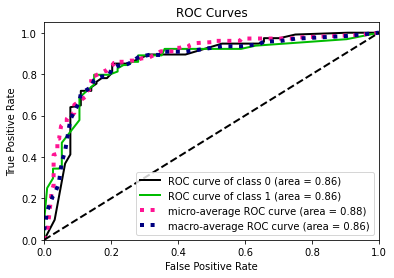

In [800]:
prob = model.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, prob)
plt.show()

# ExtraTressClassifier

In [801]:
"""grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

model =ExtraTreesClassifier()

model = GridSearchCV(model,grid, scoring="accuracy", n_jobs= 4, verbose = 1)
model.fit(xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",model.best_params_)
print("accuracy :",model.best_score_)"""

'grid = {"max_depth": [None],\n              "max_features": [1, 3, 10],\n              "min_samples_split": [2, 3, 10],\n              "min_samples_leaf": [1, 3, 10],\n              "bootstrap": [False],\n              "n_estimators" :[100,300],\n              "criterion": ["gini"]}\n\nmodel =ExtraTreesClassifier()\n\nmodel = GridSearchCV(model,grid, scoring="accuracy", n_jobs= 4, verbose = 1)\nmodel.fit(xtrain,ytrain)\n\nprint("tuned hpyerparameters :(best parameters) ",model.best_params_)\nprint("accuracy :",model.best_score_)'

In [802]:
model = ExtraTreesClassifier(bootstrap=False, criterion='gini', max_depth= None, 
                             max_features= 3, min_samples_leaf= 1, min_samples_split= 10, 
                             n_estimators= 300)
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Test accuracy : ",model.score(xtest, ytest))
etc_acc = model.score(xtest, ytest)
print("F1 score : ", f1_score(prediction, ytest))
print("Confusion metrics : \n", confusion_matrix(ytest, prediction))

Training accuracy :  0.8917018284106891
Test accuracy :  0.8314606741573034
F1 score :  0.7727272727272727
Confusion metrics : 
 [[97 17]
 [13 51]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


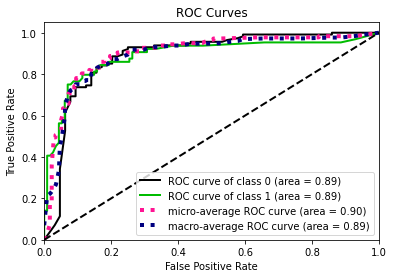

In [803]:
prob = model.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, prob)
plt.show()

# XGboost

In [804]:
param = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

model =XGBClassifier()

model = GridSearchCV(model,grid, scoring="accuracy", n_jobs= 4, verbose = 1)
model.fit(xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",model.best_params_)
print("accuracy :",model.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[19:50:14] WARNING: ../src/learner.cc:516: 
Parameters: { metric, n_neighbors, weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


tuned hpyerparameters :(best parameters)  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
accuracy : 0.8115827834137693


[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    2.3s finished


In [805]:
model = XGBClassifier(metric= 'euclidean', n_neighbors= 3, weights= 'uniform')
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Test accuracy : ",model.score(xtest, ytest))
xgb_acc = model.score(xtest, ytest)
print("F1 score : ", f1_score(prediction, ytest))
print("Confusion metrics : \n", confusion_matrix(ytest, prediction))


[19:50:14] WARNING: ../src/learner.cc:516: 
Parameters: { metric, n_neighbors, weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Training accuracy :  0.9282700421940928
Test accuracy :  0.8314606741573034
F1 score :  0.7727272727272727
Confusion metrics : 
 [[97 17]
 [13 51]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


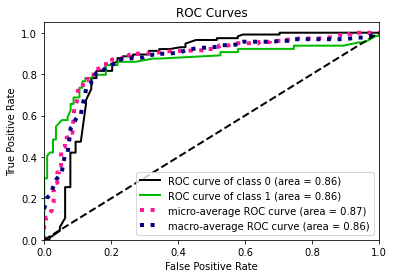

In [806]:
prob = model.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, prob)
plt.show()

In [807]:
# Compare accuracy : 
acc = [lr_acc, dt_acc, rf_acc, svc_acc, knn_acc, ada_acc, gb_acc, etc_acc, xgb_acc]

([<matplotlib.axis.XTick at 0x7f2508212e10>,
 [Text(0, 0, 'LR'),
  Text(0, 0, 'DT'),
  Text(0, 0, 'RF'),
  Text(0, 0, 'SVC'),
  Text(0, 0, 'KNN'),
  Text(0, 0, 'AB'),
  Text(0, 0, 'GB'),
  Text(0, 0, 'ETC'),
  Text(0, 0, 'XGB')])

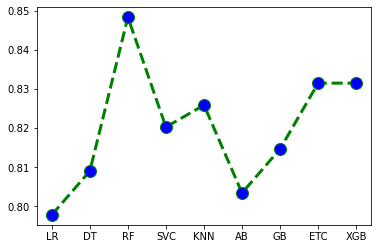

In [808]:
plt.plot(acc,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.xticks(np.arange(9), ('LR','DT','RF','SVC','KNN','AB','GB','ETC','XGB'))
           #('LogiticRegression','DicisionTree','RandomForest','SVC','KNN','Adaboost','GradientBoost','ExtraTreeclassifier'))

In [809]:
model = XGBClassifier(objective = 'binary:logistic',eta=0.3, min_child_weight =1, subsample=1, colsample_by_tree=0.4,
                      max_depth=9, learning_rate=0.03,metric= 'euclidean', n_neighbors= 3, weights= 'uniform',
                     gamma=0, reg_lambda =2.8,reg_alpha=0, scale_pos_weight=1, n_estimator= 600 )
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Test accuracy : ",model.score(xtest, ytest))
xgb_acc = model.score(xtest, ytest)
print("F1 score : ", f1_score(prediction, ytest))
print("Confusion metrics : \n", confusion_matrix(ytest, prediction))

[19:50:15] WARNING: ../src/learner.cc:516: 
Parameters: { colsample_by_tree, metric, n_estimator, n_neighbors, weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Training accuracy :  0.8832630098452883
Test accuracy :  0.848314606741573
F1 score :  0.7874015748031497
Confusion metrics : 
 [[101  13]
 [ 14  50]]


In [810]:
# highest I got highest by Adaboost on test data
prediction = model.predict(test)
data = {"PassengerId": test_id, "Survived":prediction}
results = pd.DataFrame(data)
results.to_csv("ensemble_python_voting.csv",index=False)
